<h1>CP467: Assignment 1</h1>

**Name:** Duc Minh Nguyen  
**Student ID:** 203009140  
**Mail:** [ducx9140@mylaurier.ca](mailto:ducx9140@mylaurier.ca)

In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

SCALE = 2

<h3>Question 1: Image Interpolation</h3>

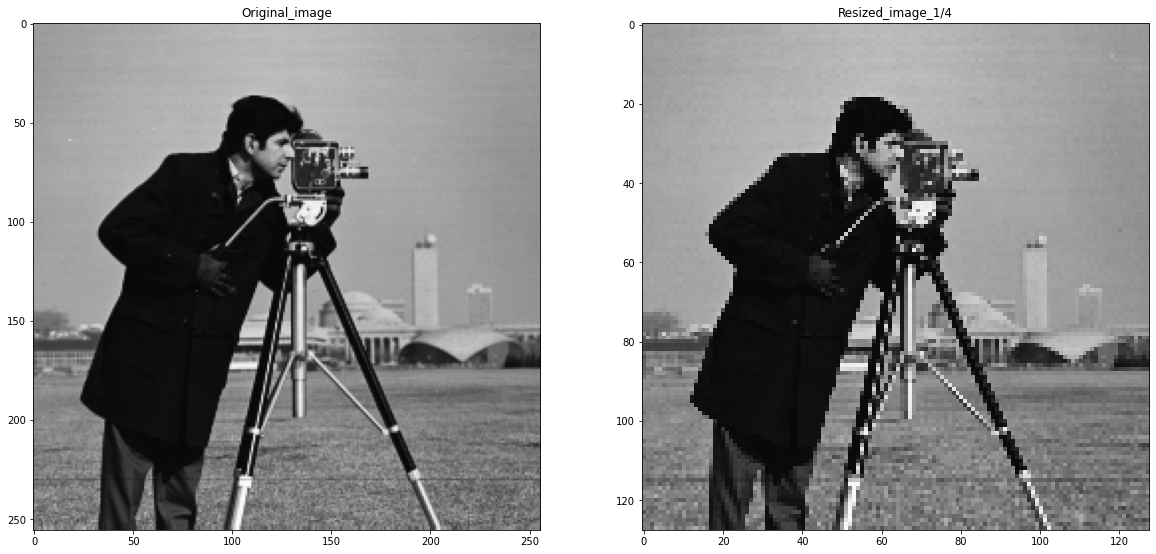

In [47]:
#
# Question 1A
#
image = cv2.imread("./Images/cameraman.tif")

# Get the original height and width of an image
# Then reduce the size of each dimension by 2
image_height, image_width, channel = int(image.shape[0]/2), int(image.shape[1]/2), int(image.shape[2])
cameraman_rescale = np.empty((image_height, image_width, channel), dtype = np.uint8)


# Copying the original pixels to new rescale_array
for h in range(image_height) : 
    for w in range(image_width) : 
        cameraman_rescale[h,w] = image[h * SCALE,w * SCALE]

# Store new cv2 image as cameraman_rescale
cv2.imwrite("./output/cameraman_rescaled.tif", cameraman_rescale)

# Plot the images
Titles = ["Original_image", "Resized_image_1/4" ]
images = [image, cameraman_rescale]

plt.figure(figsize=(20,10))
for i in range(len(Titles)):
    plt.subplot(1,2,i+1)
    plt.title(Titles[i])
    plt.imshow(images[i])

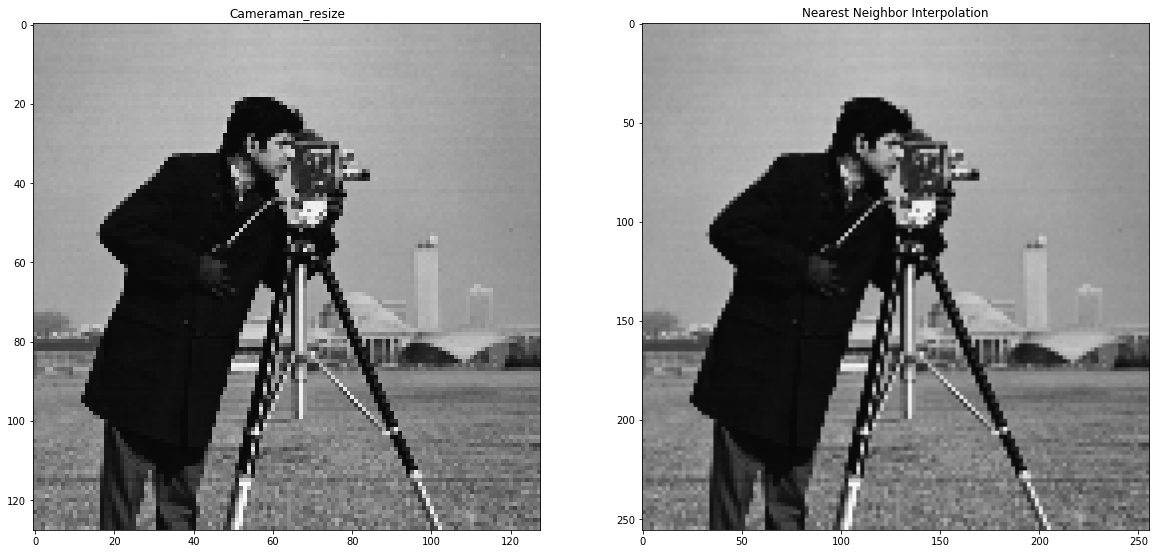

In [48]:
#
# Question 1B - Nearest Neighbor interpolation
#

nearNeighBorImage = np.empty((image_height * SCALE, image_width * SCALE, channel), dtype=np.uint8)


Titles = ["Cameraman_resize", "Nearest Neighbor Interpolation"]
img = [cameraman_rescale, nearNeighBorImage]

# Copy the pixels from cameraman_rescale to new image
for h in range(cameraman_rescale.shape[0]) : 
    for w in range(cameraman_rescale.shape[1]): 
        x_pos, y_pos = h*SCALE , w*SCALE

        # Copying pixels from cameraman_resized to new image
        nearNeighBorImage[x_pos][y_pos] = cameraman_rescale[h][w]


# Image Interpolation using Nearest Neighbor technique
for h in range(nearNeighBorImage.shape[0]) : 
    for w in range(nearNeighBorImage.shape[1]):
        original_x , original_y = h // SCALE, w // SCALE
        nearNeighBorImage[h,w] = cameraman_rescale[original_x, original_y]  

cv2.imwrite("./output/cameraman_nearest.tif", nearNeighBorImage)
plt.figure(figsize=(20,10))
for i in range(len(Titles)):
    plt.subplot(1,2,i+1)
    plt.title(Titles[i])
    plt.imshow(img[i])

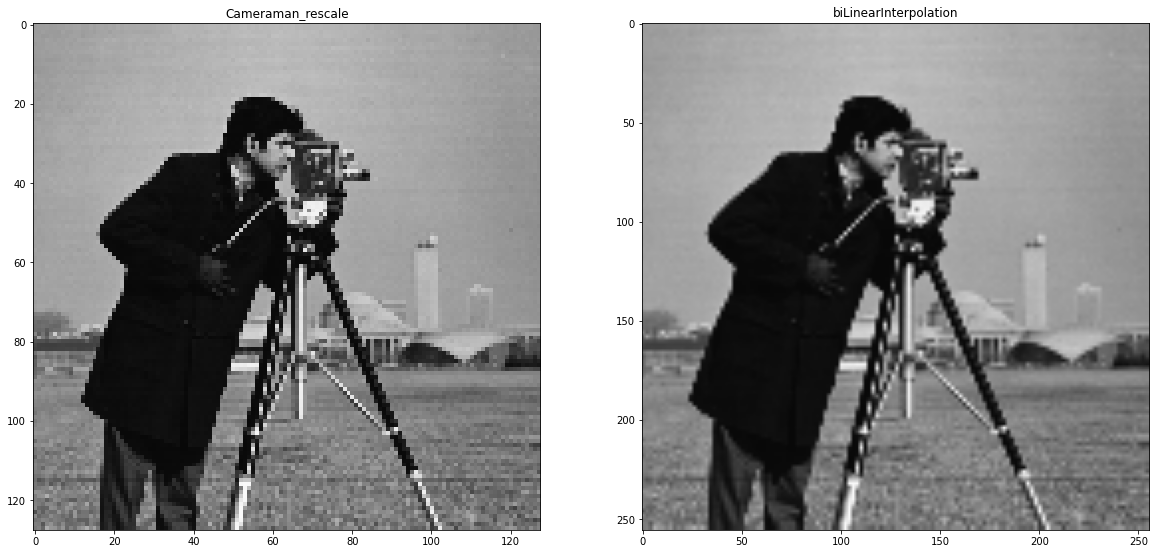

In [49]:
#
# Question 1B - Bilinear interpolation
#

biLinearInterpolation = np.empty((image_height * SCALE, image_width * SCALE , channel), dtype = np.uint8)

Titles = ["Cameraman_rescale", "biLinearInterpolation"]
img  = [cameraman_rescale, biLinearInterpolation]

# Copy the pixels from cameraman_rescale to new image
for h in range(cameraman_rescale.shape[0]) : 
    for w in range(cameraman_rescale.shape[1]): 
        x_pos, y_pos = h*SCALE , w*SCALE

        # Copying pixels from cameraman_resized to new image
        biLinearInterpolation[x_pos][y_pos] = cameraman_rescale[h][w]

# Perform the bi-linear image interpolation
for h in range(biLinearInterpolation.shape[0]): 
    for w in range(biLinearInterpolation.shape[1]):
        orig_x, orig_y = h / SCALE, w / SCALE; 

        x0, y0 = int(orig_x) , int(orig_y)
        x1, y1 = min(x0 + 1, cameraman_rescale.shape[1] - 1), min (y0 + 1, cameraman_rescale.shape[0] -1)

        # Get the distance between pixels
        a = orig_x - x0
        b = orig_y - y0 

        pixelA = cameraman_rescale[x0,y0]
        pixelB = cameraman_rescale[x1, y0]
        pixelC = cameraman_rescale[x0,y1]
        pixelD = cameraman_rescale[x1,y1]

        # Bilinear formula
        biLinearInterpolation[h,w] = (
            (1 - a) * (1 - b) * pixelA 
            + a * (1 - b) * pixelB 
            + (1 - a) * b * pixelC 
            + a * b * pixelD )


cv2.imwrite("./output/cameraman_bilinear.tif", biLinearInterpolation)
plt.figure(figsize=(20,10))
for i in range(len(Titles)):
    plt.subplot(1,2,i+1)
    plt.title(Titles[i])
    plt.imshow(img[i])

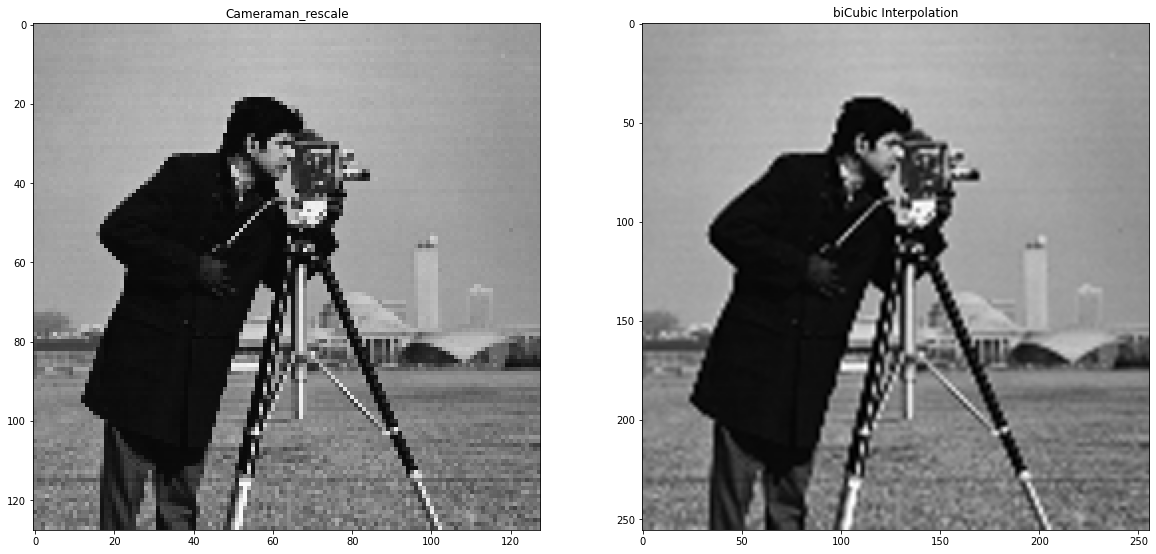

In [50]:
#
# Question 1B - Bicubic Interpolation
#
bicubic_interpolation = cv2.resize(cameraman_rescale, (image_width*2, image_height*2), interpolation = cv2.INTER_CUBIC)

Titles = ["Cameraman_rescale", "biCubic Interpolation"]
img  = [cameraman_rescale, bicubic_interpolation]

cv2.imwrite("./output/cameraman_bicubic.tif", bicubic_interpolation)
plt.figure(figsize=(20,10))
for i in range(len(Titles)):
    plt.subplot(1,2,i+1)
    plt.title(Titles[i])
    plt.imshow(img[i])

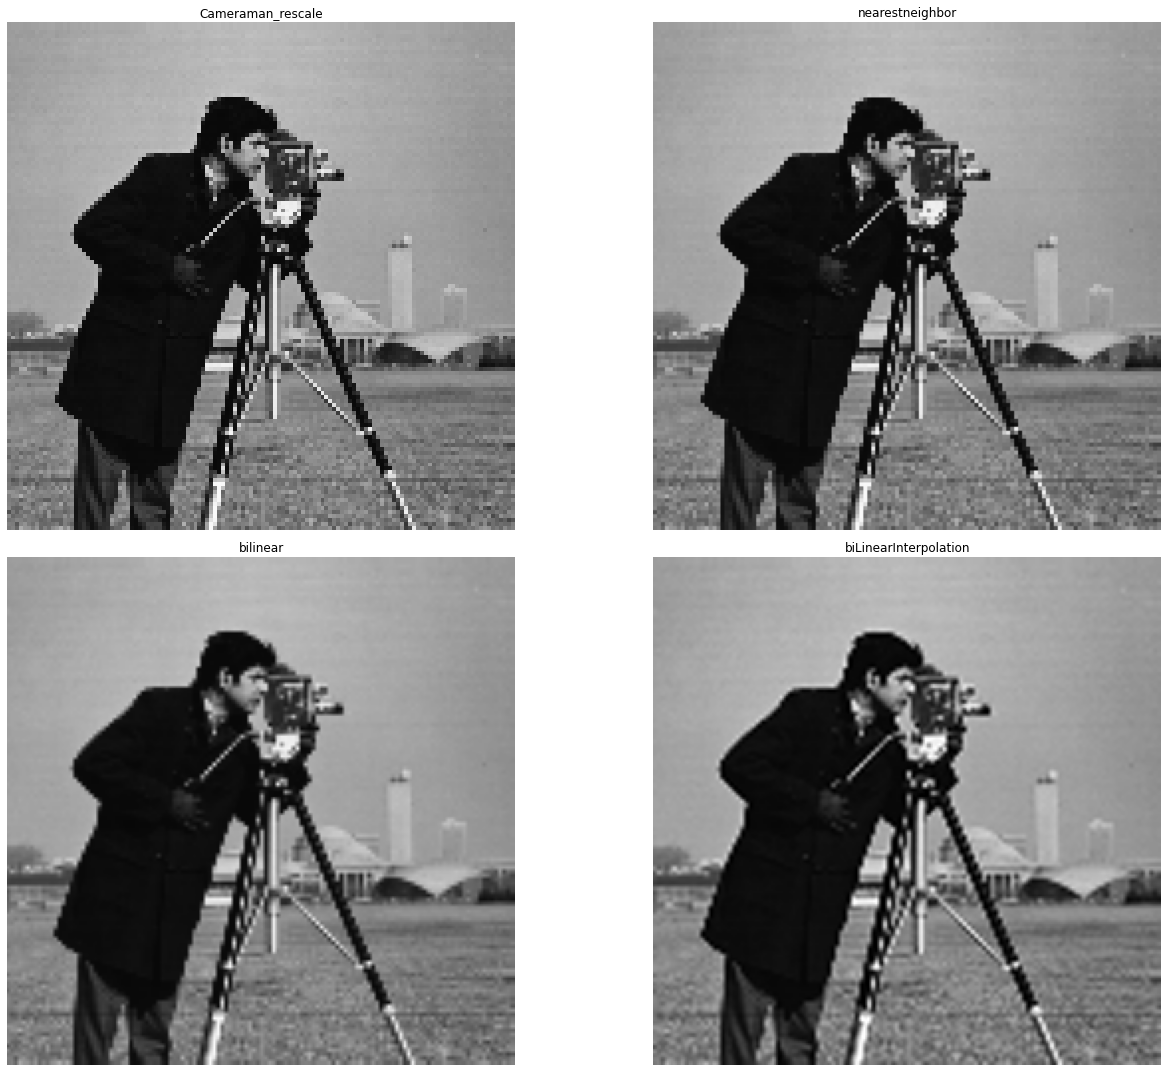

In [51]:
images = [cameraman_rescale, nearNeighBorImage, biLinearInterpolation, bicubic_interpolation]
titles = ["Cameraman_rescale", "nearestneighbor", "bilinear", "biLinearInterpolation"]

# Creating a figure and a grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Flatten the array of axes
axs = axs.ravel()

# Looping through the images and titles to display them in the 2x2 grid
for i in range(len(images)):
    axs[i].imshow(images[i], cmap='gray')  # Assuming the images are in grayscale, otherwise remove cmap
    axs[i].set_title(titles[i])
    axs[i].axis('off')  # Hide axes

# Display the plot
plt.tight_layout()
plt.show()

<h4>Bonus Question</h4>


In [52]:
#
#   Compare the quality of each image enhance technique with the original image
#

# Load the original image
original_image = cv2.imread('./Images/cameraman.tif')

# Images to compare with original
processed_images = [
    nearNeighBorImage,
    biLinearInterpolation,
    bicubic_interpolation
]

Titles = [
    "nearestNeighbor",
    "bilinear",
    "biLinearInterpolation"
]

# Function to calculate MSE
def mse(img1, img2):
    return np.sum((img1 - img2) ** 2) / float(img1.shape[0] * img1.shape[1])

# Calculate and print the MSE for each processed image
for i in range(len(processed_images)):
    error = mse(original_image, processed_images[i])
    print(f"{Titles[i]} MSE: {error}")

nearestNeighbor MSE: 78.387451171875
bilinear MSE: 70.14463806152344
biLinearInterpolation MSE: 100.36189270019531


<h3>Question 2: Point operations</h3>

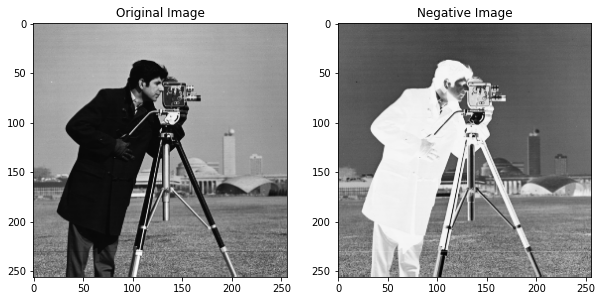

In [53]:
#
# Question 2A - Find the negatives of an image
#

negative_image = np.zeros_like(image)

for h in range(image.shape[0]):
    for w in range(image.shape[1]):
        negative_image[h,w] = 255 - image[h,w]


cv2.imwrite("./output/cameraman_negative.tif", negative_image)
plt.figure(figsize=(10,5))
plt.subplot(121), plt.imshow(image), plt.title('Original Image')
plt.subplot(122), plt.imshow(negative_image), plt.title('Negative Image')
plt.show()

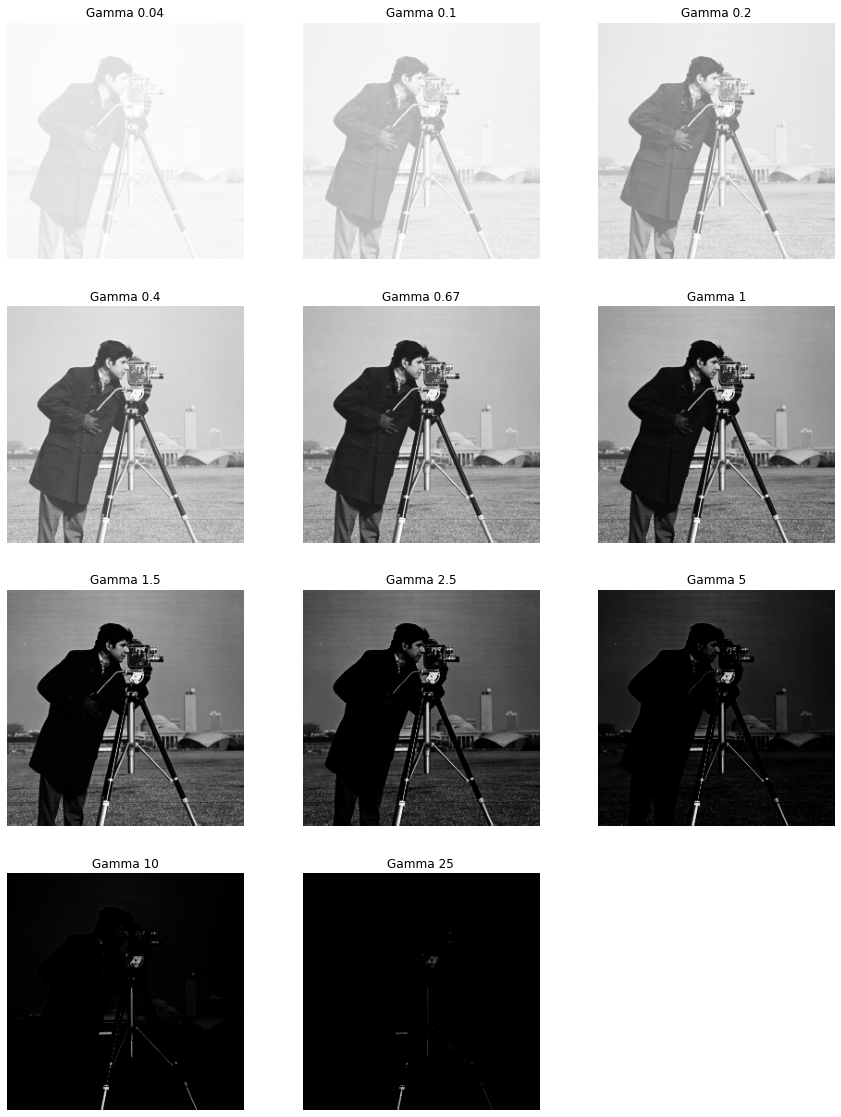

<Figure size 720x360 with 0 Axes>

In [54]:
#
# Question 2B - Apply power-law transformation on the image
#

gamma = [0.04, 0.10, 0.2, 0.4, 0.67, 1, 1.5, 2.5, 5, 10, 25]

power_law_image = np.zeros_like(image)

num_rows = 4
plt.figure(figsize=(15, 5 * num_rows))

# Display the original image in the first subplot
plt.subplot(num_rows, 3, 1), plt.imshow(image), plt.title('Original Image'), plt.axis('off')


for index, gamma in enumerate(gamma, start = 1): 
    for h in range(power_law_image.shape[0]):
        for w in range(power_law_image.shape[1]) : 
            # Normalize the pixel image to 1 and apply power-law
            power_law_image[h,w] =  ((image[h,w]/255) ** gamma)  * 255
    if index == 4:
        cv2.imwrite("./output/cameraman_power.tif", power_law_image)
    plt.subplot(num_rows, 3, index), plt.imshow(power_law_image), plt.title(f'Gamma {gamma}'), plt.axis('off')  


plt.figure(figsize=(10,5))
plt.show()

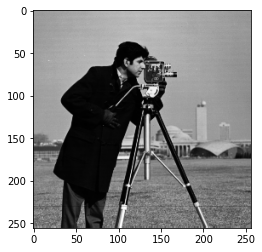

In [55]:
# 
# Question 2C - Contrast stretching 
#
image = cv2.imread("./Images/cameraman.tif")
contrast_stretching = np.zeros_like(image)

min_value = np.min(image)
max_value = np.max(image) 

for h in range(image.shape[0]) : 
    for w in range(image.shape[1]) :    
        contrast_stretching[h,w] = ((image[h,w] - min_value) / (max_value - min_value)) * 255

cv2.imwrite('./output/cameraman_contrast.tif', contrast_stretching)

<h3>Question 3: Histogram Processing</h3>

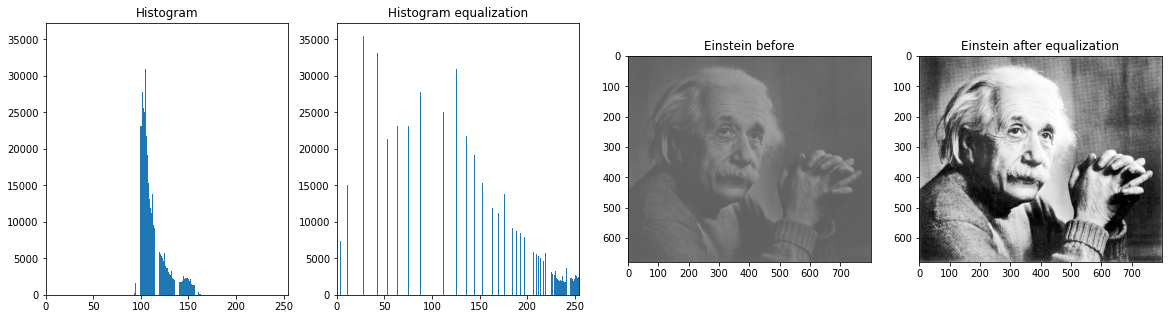

In [56]:
# 
# Question 3A - Histogram equalization 
# 

image = cv2.imread("./Images/Einstein.tif")

after_equal = np.zeros(256, dtype = int)
output_img = np.zeros_like(image)

# plot the value of each pixels in histogram graph
def compute_histogram(image): 
    histogram = np.zeros(256, dtype = int)
    for h in range(image.shape[0]) : 
        for w in range(image.shape[1]) : 
            histogram[image[h,w]] += 1
    return histogram

# CDF 
def compute_cdf_func(histogram): 
    cumulative_sum = 0 
    cdf_func = np.zeros(256, dtype = int) 
    for i in range(256) : 
        cumulative_sum += histogram[i]
        cdf_func[i] = cumulative_sum
    return cdf_func

# Perform equalization
histogram = compute_histogram(image)
cdf_func = compute_cdf_func(histogram)

min_cdf = np.min(cdf_func[cdf_func > 0])
scale_factor = 255 / (image.shape[0] * image.shape[1] - min_cdf)
normalized_cdf = ((cdf_func - min_cdf) * scale_factor).astype(np.uint8)

height, width = image.shape[0], image.shape[1]

# Plot the final image
for i in range(height):
    for j in range(width):
        output_img[i, j] = normalized_cdf[image[i, j]]

# Plot histogram after normalization
for h in range(image.shape[0]) : 
    for w in range(image.shape[1]) : 
        after_equal[output_img[h,w]] += 1


cv2.imwrite("./output/Einstein _equalized.tif", output_img)

# Plotting the result
Titles = ["Histogram", "Histogram equalization" ,"Einstein before", "Einstein after equalization"]
img  = [histogram, after_equal, image, output_img]

plt.figure(figsize=(20,5))
for i in range(len(Titles)):
    plt.subplot(1,4,i+1)
    plt.title(Titles[i])
    if i < 2:
        plt.bar(range(256), img[i])
        plt.xlim([0,255])
    else: 
        plt.imshow(img[i])
    

True

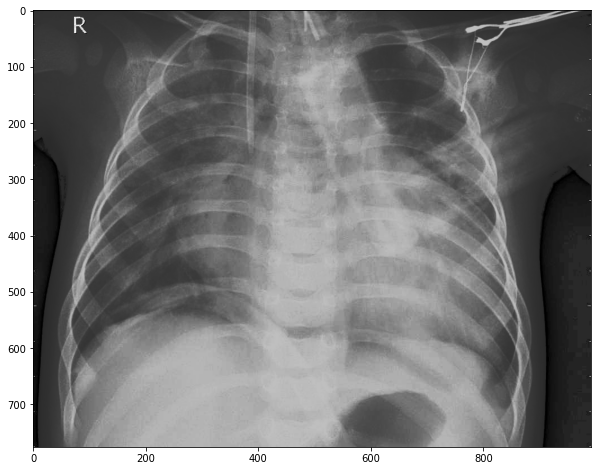

In [57]:
#
# Question 3B - Histogram matching
#

# Read the input image
chest_xray = cv2.imread("./Images/chest_x-ray1.jpeg")
chest_xray2 = cv2.imread("./Images/chest_x-ray2.jpeg")

# Generate histogram of both original and target image
orig_chest_hist = compute_histogram(chest_xray)
target_chest_hist = compute_histogram(chest_xray2)

# Compute CDF of two histogram
orig_chest_cdf = compute_cdf_func(orig_chest_hist)
target_chest_cdf = compute_cdf_func(target_chest_hist)

# Normalize the CDF to the
orig_chest_cdf = (255 * orig_chest_cdf / orig_chest_cdf[-1]).astype(np.uint8)
target_chest_cdf = (255 * target_chest_cdf / target_chest_cdf[-1]).astype(np.uint8)

# find mapping from source to target
map = np.zeros(256, dtype=np.uint8)
for i in range(256):
    # find the index that minimizes the absolute difference
    index = np.argmin(np.abs(orig_chest_cdf[i] - target_chest_cdf))
    map[i] = index

# Copying the mapped value to the output image
output_image = np.zeros_like(chest_xray)
for h in range(chest_xray.shape[0]) : 
    for w in range(chest_xray.shape[1]) : 
        output_image[h,w] = map[chest_xray[h,w]]

plt.figure(figsize=(10,10))
plt.imshow(output_image)
# img = [orig_chest_hist, target_chest_hist]
# for i in range(2) : 
#     plt.subplot(1,4,i+1)
#     plt.title(Titles[i])
#     plt.bar(range(256), img[i])
cv2.imwrite('./output/chest_x-ray3.tif', output_image)